In [1]:
import numpy as np
import glob

In [2]:
folders = glob.glob('./*/*')

In [3]:
folders

['.\\BCR\\2024_05_27__13_42_06',
 '.\\BCR\\2024_05_27__13_44_51',
 '.\\BCR\\2024_05_27__13_45_47',
 '.\\BCR\\2024_05_27__13_46_58',
 '.\\BCR\\2024_05_27__13_48_10']

In [4]:
import scipy.io
import pandas as pd

for folder in folders:
    derivatives=scipy.io.loadmat(folder+'/derivatives_out.mat')
    species=scipy.io.loadmat(folder+'/species_out.mat')
    timepoints=scipy.io.loadmat(folder+'/timepoints.mat')
    timepoints=timepoints['timepoints']
    species=species['species_out']
    derivatives=derivatives['derivatives_out']
    species=pd.DataFrame(species, index=timepoints.flatten())
    species.columns=[f'S{i}' for i in range(species.shape[1])]
    species.index.name='time'
    derivatives=pd.DataFrame(derivatives, index=timepoints.flatten())
    derivatives.columns=[f'$\partial_t S{i}$' for i in range(derivatives.shape[1])]
    derivatives.index.name='time'
    df=species.join(derivatives)
    folder_name=folder.split('\\')[2]
    df.to_csv(f'data_{folder_name}.csv')

    
    


In [5]:
dfs=[]
for csv_file in glob.glob('./*.csv'):
    dfs.append(pd.read_csv(csv_file, index_col=0))
#concatenate all dataframes into one and dropping the index
df=pd.concat(dfs).reset_index(drop=True)
df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,$\partial_t S1113$,$\partial_t S1114$,$\partial_t S1115$,$\partial_t S1116$,$\partial_t S1117$,$\partial_t S1118$,$\partial_t S1119$,$\partial_t S1120$,$\partial_t S1121$,S0
0,730440.341577,585317.631604,3.615158e+06,6.195899e+06,238895.045577,8.643072e-10,15248.430999,166357.589035,6.986633e-10,8.935497e+05,...,1.443360e-07,3.354071e-05,2.561977e-04,7.731132e+01,2.031811e-02,1.493338e+02,3.616471e+02,4.624753e-03,8.947311e-02,NaN
1,865589.496832,710888.179756,3.574970e+06,6.491118e+06,242966.103845,1.121930e-09,15863.426978,175871.708328,9.284568e-10,1.044856e+06,...,9.848641e-08,1.868933e-05,1.695635e-04,9.745335e+01,1.961951e-02,1.264184e+02,3.378304e+02,5.203614e-03,1.103019e-01,NaN
2,115380.910151,115380.207169,1.112686e+05,1.199996e+05,119999.999716,1.380535e+02,1.361351,2.606950,1.380527e+02,4.279434e+03,...,2.232804e-25,8.339580e-18,1.121754e-16,1.250482e-06,2.413633e-13,3.161855e-05,7.004705e-05,2.528237e-15,1.247526e-09,NaN
3,115407.728656,115407.275307,1.112727e+05,1.200000e+05,119999.999968,1.381435e+02,1.247712,1.960094,1.381430e+02,4.280587e+03,...,1.419783e-25,2.645328e-19,4.152657e-17,1.089697e-05,1.243332e-13,3.787004e-06,1.660261e-05,3.995675e-14,1.085608e-08,NaN
4,29696.476890,29696.495350,2.941458e+04,3.000000e+04,30000.000000,8.903415e+00,0.141142,0.175124,8.903421e+00,2.911698e+02,...,7.088757e-29,7.795995e-22,1.058060e-19,9.732877e-09,2.788445e-16,1.478142e-07,3.238233e-07,4.869930e-18,9.709106e-12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10005,1663.224934,1312.874802,2.983016e+06,3.694412e+06,238040.873434,9.539281e-12,4801.491392,7712.282212,8.204912e-12,1.868056e+03,...,8.442005e-07,-2.421546e-04,-4.726358e-04,-1.466478e+01,-7.470457e-04,-3.947825e+01,-7.178312e+01,6.055485e-04,-1.493809e-02,0.000006
10006,1661.838255,1311.525193,2.981748e+06,3.693082e+06,238040.972833,9.536563e-12,4798.774150,7706.720228,8.201230e-12,1.865822e+03,...,8.443200e-07,-2.419224e-04,-4.713440e-04,-1.460009e+01,-7.332228e-04,-3.950858e+01,-7.179889e+01,6.093590e-04,-1.487334e-02,0.000006
10007,1660.456410,1310.179881,2.980481e+06,3.691754e+06,238041.071876,9.533844e-12,4796.066878,7701.179359,8.197548e-12,1.863594e+03,...,8.444327e-07,-2.416881e-04,-4.700571e-04,-1.453584e+01,-7.194364e-04,-3.953840e+01,-7.181420e+01,6.131372e-04,-1.480903e-02,0.000006
10008,1659.079364,1308.838836,2.979216e+06,3.690427e+06,238041.170566,9.531121e-12,4793.369520,7695.659466,8.193865e-12,1.861374e+03,...,8.445385e-07,-2.414518e-04,-4.687750e-04,-1.447203e+01,-7.056867e-04,-3.956772e+01,-7.182904e+01,6.168832e-04,-1.474517e-02,0.000006


In [6]:
#shuffle the data
df=df.sample(frac=1).reset_index(drop=True)

In [7]:
df.to_csv('BCR.csv', index=False)

In [19]:
import re
import networkx as nx
import matplotlib.pyplot as plt

class Species:
    def __init__(self, id, name,use_id=False):
        self.id = id
        self._name = name
        self.use_id=use_id
    
    @property
    def name(self):
        if self.use_id:
            return f'S{int(self.id)-1}'
        return self._name

def parse_net_file(filepath):
    with open(filepath, 'r') as file:
        content = file.read()

    species_block = re.search(r'begin species(.*?)end species', content, re.DOTALL).group(1)
    reactions_block = re.search(r'begin reactions(.*?)end reactions', content, re.DOTALL).group(1)
    
    # Parse species
    species = {}
    for line in species_block.splitlines():
        line = line.strip()
        if line and not line.startswith('#'):
            id, name, _ = line.split()
            species[id] = Species(id, name,True)

    # Create a graph
    G = nx.DiGraph()

    # Add species nodes and derivative nodes
    for sp in species.values():
        G.add_node(sp.name)
        G.add_node(f"$\partial_t {sp.name}$")

    # Parse reactions and add edges
    for line in reactions_block.splitlines():
        line = line.strip()
        if line and not line.startswith('#'):
            parts = line.split()
            reaction_id = parts[0]
            reactant_ids = parts[1].split(',')
            product_ids = parts[2].split(',')
            constant = parts[3]
            if constant in ['km1','km2']:
                print(f"Reaction {reaction_id} has rate zero, skipping")
                continue
            
            involved_species = [species[s] for s in reactant_ids + product_ids if s in species]
            reactants= [species[s] for s in reactant_ids if s in species]
            
            for reactant in reactants:
                for involved_specie in involved_species:
                    G.add_edge(reactant.name, f"$\partial_t {involved_specie.name}$", label=constant)

    return G

# Example usage
G = parse_net_file('./BCR/2024_05_27__13_48_10/BCR.net')
derivatives=[]
for derivative in G.nodes:
    if derivative.startswith('$\partial_t'):
        derivatives.append(derivative)

'''# Draw the graph
pos = nx.bipartite_layout(G, derivatives, align='vertical',scale=5)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=400, font_size=9, font_weight='bold')
labels = nx.get_edge_attributes(G, 'label')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
'''

"# Draw the graph\npos = nx.bipartite_layout(G, derivatives, align='vertical',scale=5)\nnx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=400, font_size=9, font_weight='bold')\nlabels = nx.get_edge_attributes(G, 'label')\n#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)\nplt.show()\n"

In [21]:
G.nodes

NodeView(('S0', '$\\partial_t S0$', 'S1', '$\\partial_t S1$', 'S2', '$\\partial_t S2$', 'S3', '$\\partial_t S3$', 'S4', '$\\partial_t S4$', 'S5', '$\\partial_t S5$', 'S6', '$\\partial_t S6$', 'S7', '$\\partial_t S7$', 'S8', '$\\partial_t S8$', 'S9', '$\\partial_t S9$', 'S10', '$\\partial_t S10$', 'S11', '$\\partial_t S11$', 'S12', '$\\partial_t S12$', 'S13', '$\\partial_t S13$', 'S14', '$\\partial_t S14$', 'S15', '$\\partial_t S15$', 'S16', '$\\partial_t S16$', 'S17', '$\\partial_t S17$', 'S18', '$\\partial_t S18$', 'S19', '$\\partial_t S19$', 'S20', '$\\partial_t S20$', 'S21', '$\\partial_t S21$', 'S22', '$\\partial_t S22$', 'S23', '$\\partial_t S23$', 'S24', '$\\partial_t S24$', 'S25', '$\\partial_t S25$', 'S26', '$\\partial_t S26$', 'S27', '$\\partial_t S27$', 'S28', '$\\partial_t S28$', 'S29', '$\\partial_t S29$', 'S30', '$\\partial_t S30$', 'S31', '$\\partial_t S31$', 'S32', '$\\partial_t S32$', 'S33', '$\\partial_t S33$', 'S34', '$\\partial_t S34$', 'S35', '$\\partial_t S35$', 'S

In [22]:
max(G.degree, key=lambda x: x[1])

('S4', 649)

In [24]:
len(nx.ancestors(G,'$\partial_t S0$'))

131

In [25]:
var_number = len(G.nodes)//2

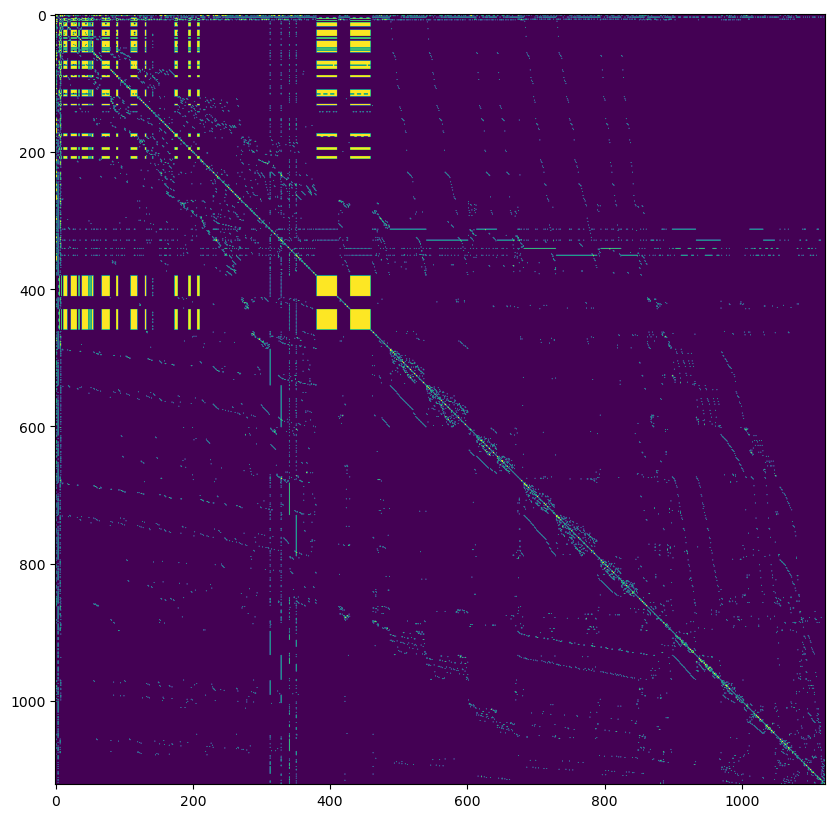

In [26]:
node_list=[f'S{i}' for i in range(var_number)]
node_list+=[f'$\partial_t S{i}$' for i in range(var_number)]
plt.figure(figsize=(10,10))
plt.imshow(nx.adjacency_matrix(G,nodelist=node_list)[:var_number,var_number:].todense())

In [27]:
import pickle
with open('BCR.pkl', 'wb') as f:
    pickle.dump(G, f)

In [ ]:
derivatives=[]
for derivative in G.nodes:
    if derivative.startswith('$\partial_t'):
        derivatives.append(derivative)
        print(derivative)
        print(nx.ancestors(G, derivative))


$\partial_t 1$
{'438', '76', '32', '17', '176', '7', '210', '404', '435', '455', '77', '433', '71', '177', '175', '72', '396', '78', '56', '13', '387', '382', '119', '399', '451', '446', '3', '394', '51', '448', '31', '411', '434', '458', '44', '92', '437', '390', '383', '388', '91', '444', '211', '10', '113', '402', '410', '454', '397', '49', '8', '14', '452', '1', '114', '431', '26', '385', '29', '440', '24', '132', '406', '18', '40', '449', '450', '48', '55', '441', '432', '42', '9', '73', '395', '41', '445', '442', '197', '456', '400', '15', '178', '35', '198', '79', '80', '443', '392', '386', '208', '447', '457', '439', '115', '120', '384', '398', '408', '196', '209', '118', '43', '459', '47', '314', '453', '436', '407', '133', '36', '52', '16', '405', '403', '393', '352', '409', '330', '391', '389', '70', '195', '112', '111', '342', '401', '2', '460', '69', '25'}
$\partial_t 2$
{'109', '269', '160', '248', '827', '231', '287', '7', '854', '842', '242', '103', '54', '822', '475', 

In [1]:
#open cdat file, then save it as a csv file
import numpy as np
import pandas as pd
import re
import glob
import os

def parse_cdat_file(filepath):
    with open(filepath, 'r') as file:
        content = file.read()

    data = []
    for line in content.splitlines():
        line = line.strip()
        if line and not line.startswith('#'):
            data.append([float(x) for x in line.split()])

    return data

path ='./BCR.cdat'

data = parse_cdat_file(path)
df=pd.DataFrame(data, columns=[f'S{i}' for i in range(len(data[0]))])
df.to_csv('BCR.csv', index=False)


In [2]:
mat_files = glob.glob('./*.mat')
mat_files

['./species_derivatives_non_uniform.mat',
 './species_initial_conditions_non_uniform.mat',
 './species_initial_conditions.mat',
 './species_derivatives.mat']

In [7]:
#open the mat files, join the two non uniform as one, then save it as a csv file
import scipy.io
import pandas as pd

species_non_uniform=scipy.io.loadmat('species_initial_conditions_non_uniform.mat')
derivatives_non_uniform=scipy.io.loadmat('species_derivatives_non_uniform.mat')
species_uniform=scipy.io.loadmat('species_initial_conditions.mat')
derivatives_uniform=scipy.io.loadmat('species_derivatives.mat')

species_non_uniform=species_non_uniform['all_species_init']
derivatives_non_uniform=derivatives_non_uniform['all_derivatives']
species_uniform=species_uniform['all_species_init']
derivatives_uniform=derivatives_uniform['all_derivatives']

In [8]:
#join the two non uniform as one dataframe
species_non_uniform=pd.DataFrame(species_non_uniform)
species_non_uniform.columns=[f'S{i}' for i in range(species_non_uniform.shape[1])]
species_non_uniform.index.name='time'
derivatives_non_uniform=pd.DataFrame(derivatives_non_uniform)
derivatives_non_uniform.columns=[f'$\partial_t S{i}$' for i in range(derivatives_non_uniform.shape[1])]
derivatives_non_uniform.index.name='time'
df_non_uniform=species_non_uniform.join(derivatives_non_uniform)
df_non_uniform

,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,$\partial_t S1112$,$\partial_t S1113$,$\partial_t S1114$,$\partial_t S1115$,$\partial_t S1116$,$\partial_t S1117$,$\partial_t S1118$,$\partial_t S1119$,$\partial_t S1120$,$\partial_t S1121$
time,,,,,,,,,,,,,,,,,,,,,
0,295425.237066,289648.686665,274596.884862,257895.741728,299996.757060,299999.850629,310.221170,0.854823,8.248989,555.788217,...,9.131595e-07,-2.680345e-19,-9.260970e-12,-1.160692e-11,-0.002118,1.663163e-08,0.002809,0.003223,9.288772e-09,0.000328
1,297234.087001,282718.112165,278695.776598,254346.300155,299998.953627,299999.934135,443.927554,1.700336,6.869809,67.111093,...,4.620801e-07,-6.099212e-19,-1.323759e-11,-2.767187e-11,-0.000647,-1.427651e-08,-0.004053,0.015375,4.173450e-09,-0.000054
2,299436.769418,290507.504022,291552.183344,299569.002645,299992.213018,299999.824826,589.810730,0.008087,9.856860,479.483264,...,-2.106094e-07,-2.868906e-19,-5.508731e-12,1.210080e-11,-0.001048,3.487487e-08,0.002396,0.020483,4.234160e-09,-0.000106
3,299533.025549,292114.377698,297255.135391,252349.453285,299986.379628,299999.884008,45.126916,2.652293,14.550111,65.955327,...,5.429385e-07,-5.166137e-20,6.868952e-12,1.381665e-11,0.002419,-3.683036e-08,-0.001193,0.016909,-4.118986e-09,-0.000028
4,298693.044502,275008.631821,294949.569314,263957.692069,299994.518110,299999.886605,413.204710,1.341976,5.549736,739.027381,...,2.408656e-07,4.190547e-19,-1.833946e-11,-3.864108e-11,0.000676,1.309435e-08,0.002146,0.010485,-2.038575e-09,-0.000196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,297426.118522,285643.706844,280477.935810,287816.081130,299997.565980,299999.974485,201.953097,4.698644,14.150300,457.867258,...,3.802445e-07,2.218661e-19,-1.548398e-11,-7.891893e-12,0.000259,8.915759e-09,0.002899,0.003192,4.486831e-09,-0.000527
9996,296990.091411,288703.826492,294758.487457,285741.757004,299992.901547,299999.829176,504.406693,3.232353,1.215914,449.653222,...,5.685183e-07,1.820348e-19,-6.962942e-12,8.501314e-12,0.002519,4.833320e-08,0.000926,0.009151,-7.230909e-09,-0.000605
9997,298684.197540,292466.280855,278189.380909,295400.009966,299998.189153,299999.964927,634.584439,2.323596,2.215477,67.006458,...,8.448899e-07,2.079303e-19,-1.515946e-11,3.100439e-11,-0.000154,1.816338e-08,-0.000531,0.015948,1.260782e-09,0.000307


In [9]:
#join the two uniform as one dataframe
species_uniform=pd.DataFrame(species_uniform)
species_uniform.columns=[f'S{i}' for i in range(species_uniform.shape[1])]
species_uniform.index.name='time'
derivatives_uniform=pd.DataFrame(derivatives_uniform)
derivatives_uniform.columns=[f'$\partial_t S{i}$' for i in range(derivatives_uniform.shape[1])]
derivatives_uniform.index.name='time'
df_uniform=species_uniform.join(derivatives_uniform)
df_uniform

,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,$\partial_t S1112$,$\partial_t S1113$,$\partial_t S1114$,$\partial_t S1115$,$\partial_t S1116$,$\partial_t S1117$,$\partial_t S1118$,$\partial_t S1119$,$\partial_t S1120$,$\partial_t S1121$
time,,,,,,,,,,,,,,,,,,,,,
0,0.872995,0.258391,0.222548,0.865075,0.006389,0.307317,0.689190,0.612599,0.032746,0.004956,...,414.121025,-607.379209,245.860647,1236.455751,3885.052506,1432.921968,2435.456029,1837.290757,664.621838,381.660465
1,0.177448,0.448519,0.892770,0.192859,0.771864,0.928737,0.017848,0.289916,0.000958,0.010268,...,355.803877,-858.675959,-2.037466,862.236998,2967.906927,2170.672995,2175.999670,2588.511472,1692.116035,1287.014376
2,0.340680,0.570078,0.998653,0.057214,0.491247,0.267313,0.412853,0.227748,0.658479,0.979586,...,212.052065,-430.789093,1091.800894,154.178383,3163.325683,1090.303392,1026.580469,1928.537903,2622.456177,550.399502
3,0.479903,0.526346,0.105414,0.382804,0.303066,0.459272,0.186838,0.460450,0.082807,0.546456,...,200.863198,-1554.053313,-890.349184,1708.265119,2454.615943,879.167918,2348.641473,1899.636315,2353.714969,1602.994661
4,0.779705,0.506842,0.873881,0.579235,0.133748,0.064157,0.164629,0.422048,0.720382,0.984089,...,-22.323701,-1081.489019,-1452.138727,1409.851417,2868.674541,1911.408665,3239.058777,2566.731976,981.383939,2672.800697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.741938,0.553394,0.122552,0.315124,0.605178,0.413084,0.535587,0.350225,0.756366,0.215708,...,244.472082,-529.148679,326.892413,879.321891,3084.463411,639.180626,1457.690128,2561.662390,1399.592603,738.031081
9996,0.976695,0.322520,0.061247,0.264253,0.976927,0.330817,0.650543,0.672399,0.353327,0.824186,...,60.713642,777.954782,-725.398390,1524.756426,1713.113517,1064.130513,1874.589536,2540.887684,-742.985098,1629.053069
9997,0.505065,0.177356,0.817247,0.856556,0.157023,0.521938,0.536912,0.888402,0.685757,0.966430,...,-73.246748,-426.498893,-241.613761,1596.848887,2476.240785,1243.812527,3107.594789,1865.723347,1313.990506,2303.902759


In [10]:
#save both as csv
df_non_uniform.to_csv('BCR_non_uniform.csv', index=False)
df_uniform.to_csv('BCR_uniform.csv', index=False)